<a href="https://colab.research.google.com/github/mrinmoy-sadhukhan/mrinmoy-sadhukhan/blob/main/covid_19_twitter_analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

# Author :- **Mrinmoy Sadhukhan**

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

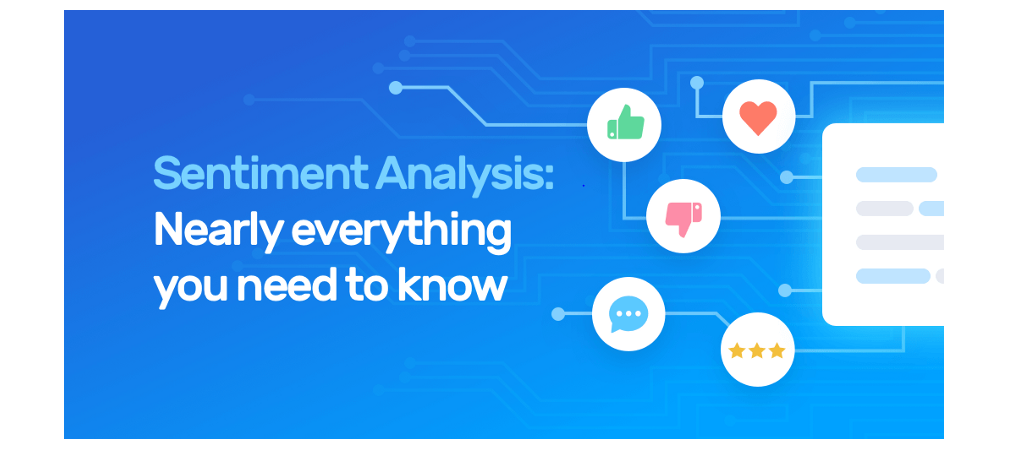

COVID-19 originally known as Corona VIrus Disease of 2019, has been declared as a pandemic by World Health Organization (WHO) on 11th March 2020. Unprecedented pressures have mounted on each country to make compelling requisites for controlling the population by assessing the cases and properly utilizing available resources. The rapid number of exponential cases globally has become the apprehension of panic, fear and anxiety among people. The mental and physical health of the global population is found to be directly proportional to this pandemic disease. It is the need of the hour to implement different measures to safeguard the countries by demystifying the pertinent facts and information.

# Workflow

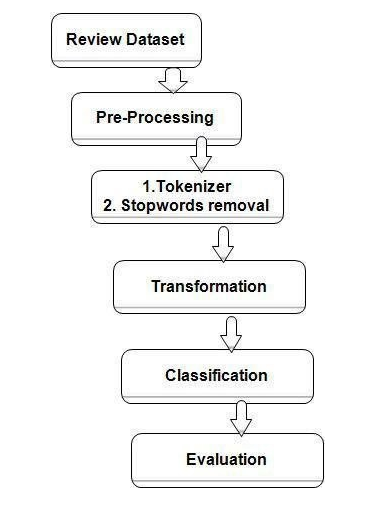

#**1.Lets Invite Some Libraries.**

In [80]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
working_dir_path = '/content/drive/MyDrive/kaggle/nltkcovid19senti/Copy of Coronavirus Tweets - Copy.csv'
df = pd.read_csv(working_dir_path,encoding = 'latin')

# **2. Reviewing Our Dataset**

In [83]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Negative


In [84]:
# There are null values in location column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [85]:
# There 41157 rows and 6 columns in our database
df.shape

(41157, 6)

In [86]:
# Names Of columns in our dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [87]:
# All tweets came only from March and April month of 2020.
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
8/4/2020      1881
7/4/2020      1843
6/4/2020      1742
24-03-2020    1480
9/4/2020      1471
13-04-2020    1428
26-03-2020    1277
5/4/2020      1131
10/4/2020     1005
2/4/2020       954
11/4/2020      909
3/4/2020       810
12/4/2020      803
4/4/2020       767
16-03-2020     656
1/4/2020       630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [88]:
df.Sentiment.value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [89]:
# There are 12220 unique locations from where the tweets came.
df['Location'].value_counts()

London                            540
United States                     528
London, England                   520
New York, NY                      395
Washington, DC                    373
                                 ... 
College Park, Md.                   1
Dickson, TN                         1
https://clickclickclick.click/      1
Free Palestine                      1
Suffolk UK                          1
Name: Location, Length: 12220, dtype: int64

In [90]:
# There are 5 unique sentiment types in our dataset
df['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

# Going deeper into tweet and sentiment.

In [91]:
df[df['Sentiment']=='Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Negative
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our h...",Negative
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 the world must not play fair with china 100 goverments must demand china adopts new guilde lines on food safty the chinese goverment is guilty...,Negative
24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checko...,Negative
26,3825,48777,"Ketchum, Idaho",16-03-2020,"In preparation for higher demand and a potential food shortage, The Hunger Coalition purchased 10 percent more food and implemented new protocols due to the COVID-19 coronavirus. https://t.co/5Cec...",Negative
...,...,...,...,...,...,...
41133,44932,89884,Austria,14-04-2020,A Singaporean politician who slammed a woman snapped with seven supermarket trolleys during COVID-19 lockdown has been forced to eat humble pie after it turned out she was donating goods to the po...,Negative
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?? #COVID19 #coronavirus #toiletpaper,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,"Still shocked by the number of #Toronto supermarket employees working without some sort of mask. We all know by now, employees can be asymptomatic while spreading #coronavirus .",Negative
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,Negative


In [92]:
df[df['Sentiment']=='Negative'].loc[41149,'OriginalTweet']

'Still shocked by the number of #Toronto supermarket employees working without some sort of mask. We all know by now, employees can be asymptomatic while spreading #coronavirus .'

In [93]:
df[df['Sentiment']=='Neutral']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ,Neutral
10,3809,48761,"Makati, Manila",16-03-2020,"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a singl...",Neutral
16,3815,48767,Saudi Arabia,16-03-2020,????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https:...,Neutral
17,3816,48768,"Ontario, Canada",16-03-2020,"@eyeonthearctic 16MAR20 Russia consumer surveillance watchdog reported case in high Arctic where a man who traveled to Iran has COVID-19 and 101 are ""observed""\r\r\nhttps://t.co/4WnrrK9oKC https:/...",Neutral
...,...,...,...,...,...,...
41141,44940,89892,India,14-04-2020,#Coronavirus ?? ????? ??? ????? ?? ??? ??????? ?? ????? ???? ?? ?? ??? ??? ?? ??? ?? ??????? ???? ??? ???????????? @narendramodi ?? ??? ????? ?? ????? ???? ?? ????\r\r\n#ATCard #StayHome #Lockdown...,Neutral
41143,44942,89894,In burning hell.,14-04-2020,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUnido #cruiseships #SaveTheChildren #wuhan #BillGates?#SocialDistance #coronavirus is caused by #cellpoisoning from #radiation #cancer #exosomes #youcan...,Neutral
41144,44943,89895,NaN,14-04-2020,@_Sunrise_SV @Gamzap @NPR What does not having a supermarket nearby have to do with getting COVID-19?,Neutral
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral


In [94]:
df[df['Sentiment']=='Neutral'].loc[17,'OriginalTweet']

'@eyeonthearctic 16MAR20 Russia consumer surveillance watchdog reported case in high Arctic where a man who traveled to Iran has COVID-19 and 101 are "observed"\r\r\nhttps://t.co/4WnrrK9oKC https://t.co/ld05k5Eyns'

In [95]:
df[df['Sentiment']=='Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and ot...",Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,"Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about"". https://t.co/ieFDNeHgDO",Positive
...,...,...,...,...,...,...
41146,44945,89897,"Gurgaon, India",14-04-2020,"#Gold prices rose to a more than 7-year high today due to #coronavirus increased bullion's #safe-haven appeal.\r\r\nIt gained 0.1% to $1,715.25/ounce , having touched its highest since Dec. 2012 a...",Positive
41148,44947,89899,NaN,14-04-2020,"UV light Sterilizer Sanitizer for your mask and mobile phone ?, pls take care, be safe. #sanitizer #sanitizers #corona #coronavirus #coronavÃ­rus #coronavirÃ¼s https://t.co/v8XDXhqeYN",Positive
41150,44949,89901,OHIO,14-04-2020,"I never that weÂd be in a situation &amp; world that going to the supermarket , picking up a package or my mail is like playing Russian roulette with my life #coronavirus #StayHome #SocialDistancing",Positive
41151,44950,89902,NaN,14-04-2020,"@MrSilverScott you are definitely my man. I feel like this fall when we are out and about again, we need to honor our heroes from COVID-19. You know who they are Â our healthcare people , grocery...",Positive


In [96]:
df[df['Sentiment']=='Positive'].loc[1,'OriginalTweet']

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [97]:
df[df['Sentiment']=='Positive'].loc[6,'OriginalTweet']

'Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented "I\'m in Civics class so I know what I\'m talking about". https://t.co/ieFDNeHgDO'

In [98]:
pd.isnull(df["Sentiment"])


0        False
1        False
2        False
3        False
4        False
         ...  
41152    False
41153    False
41154    False
41155    False
41156    False
Name: Sentiment, Length: 41157, dtype: bool

# Looking For Null Values

Only Location column contains 28% null values. But this column is not useful for our sentiment analysis.Hence we will neglect these null values.

In [99]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

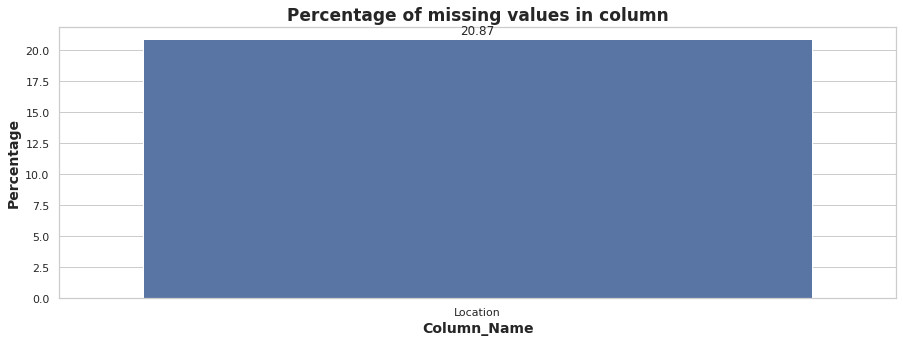

In [100]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()


# Heat Map for missing values

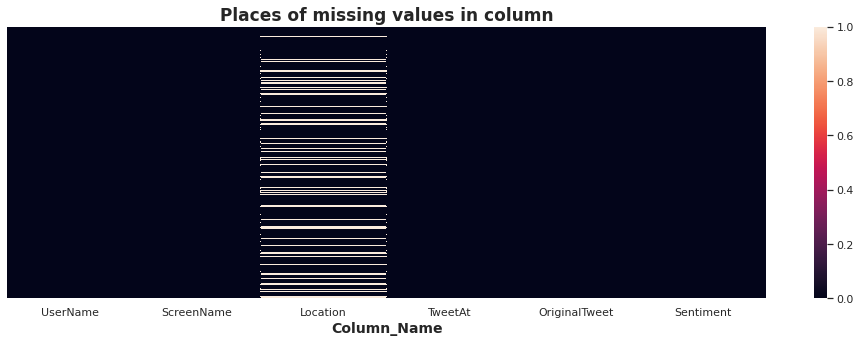

In [101]:
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

# Unique Values In Each Feature Coulmn

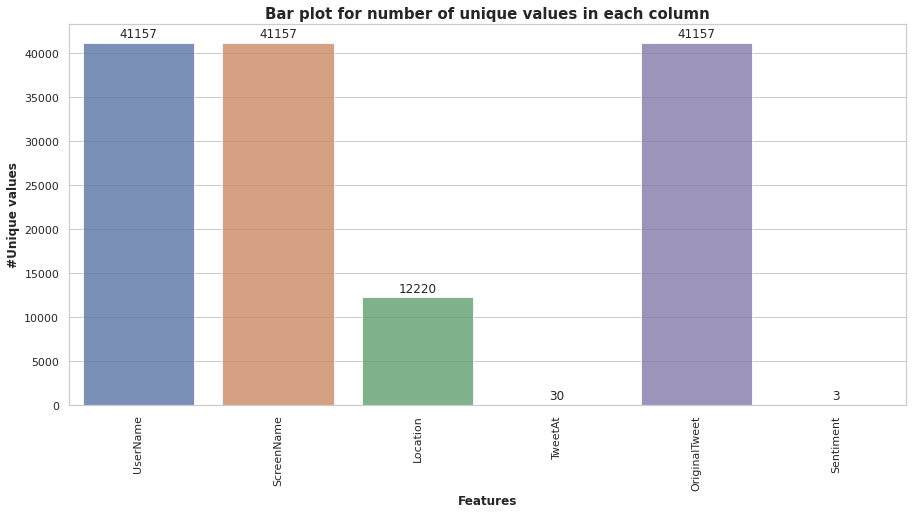

In [102]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# Plot Of Top 15 Locations Of Tweet.

In [103]:
loc_analysis = pd.DataFrame(df['Location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'Location':'count'})

In [104]:
import plotly.graph_objects as go


In [105]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

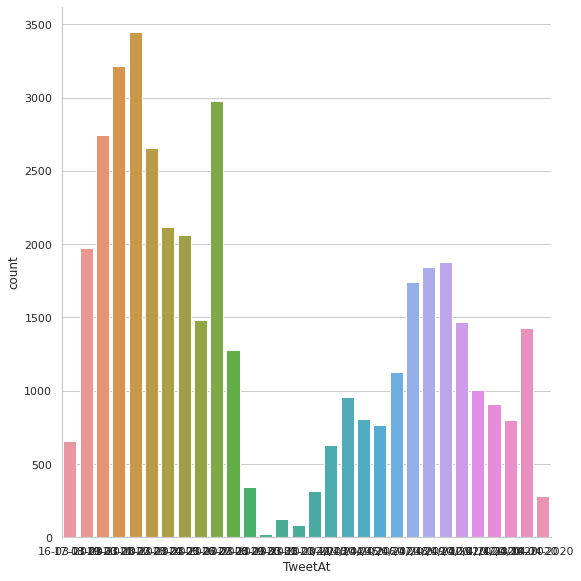

In [106]:
sns.catplot("TweetAt", data=df, kind="count", height=8)

# Top 10 locations of tweet

In [107]:
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [108]:
Top_Location_Of_tweet.head(10)

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [109]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,Location,Location_Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


[Text(0, 0, 'London'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'London, England'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'Washington, DC'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'India'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'Australia')]

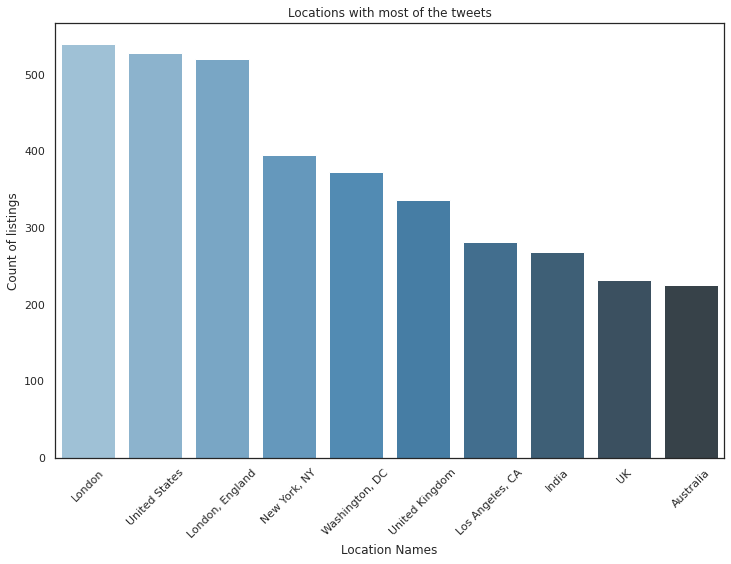

In [110]:
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet_df,
                 palette='Blues_d')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

# Sentiments Countplot

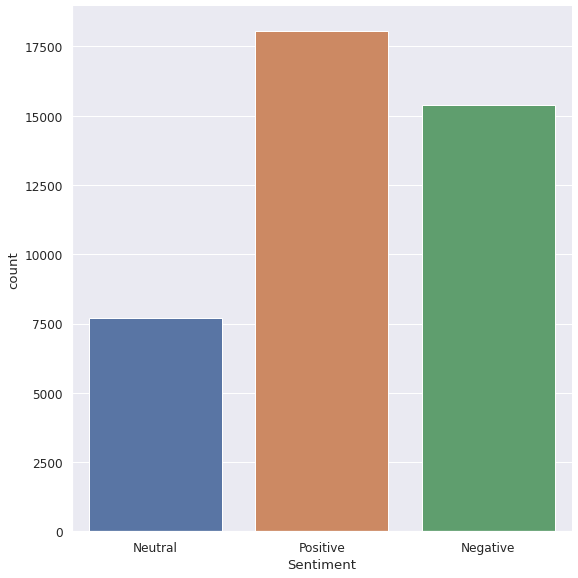

In [111]:
sns.set(font_scale=1.1)
sns.catplot("Sentiment", data=df, kind="count", height=8)

In [112]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
8/4/2020      1881
7/4/2020      1843
6/4/2020      1742
24-03-2020    1480
9/4/2020      1471
13-04-2020    1428
26-03-2020    1277
5/4/2020      1131
10/4/2020     1005
2/4/2020       954
11/4/2020      909
3/4/2020       810
12/4/2020      803
4/4/2020       767
16-03-2020     656
1/4/2020       630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

# Data Preprocessing

**A) Removing @user**

In [113]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [114]:
# create new column with removed @user
df['Tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')

In [115]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...


**REMOVED HTTP AND URLS FROM TWEET**

In [116]:
import re
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [117]:
df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak"


**B) Removing Punctuations, Numbers, and Special Characters**

In [118]:
# remove special characters, numbers, punctuations
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

In [119]:
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID outbreak
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...",Positive,My food stock is not the only one which is empty PLEASE don t panic THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need Stay calm stay safe #COVID france #COVID #COVID #co...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...",Negative,Me ready to go at supermarket during the #COVID outbreak Not because I m paranoid but because my food stock is litteraly empty The #coronavirus is a serious thing but please don t panic It causes ...


**C) Removing Short Words**

In [120]:
# remove short words
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [121]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...


In [122]:
def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text

# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
#df['text'].transform(clean_tweet_text)
df['Tweet']=df['Tweet'].apply(lambda x:clean_tweet_text(x))
df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak


In [123]:
df['Tweet'].replace('', np.nan, inplace=True)

In [124]:
df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,NaN
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak


In [125]:
df.dropna(subset=['Tweet'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40965 entries, 1 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       40965 non-null  int64 
 1   ScreenName     40965 non-null  int64 
 2   Location       32439 non-null  object
 3   TweetAt        40965 non-null  object
 4   OriginalTweet  40965 non-null  object
 5   Sentiment      40965 non-null  object
 6   Tweet          40965 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.5+ MB


In [126]:
tweets_text_postive_temp=df[df['Sentiment'].str.contains('Positive')]
#tweets_text_postive=[]
tweets_text_postive=tweets_text_postive_temp[['Tweet','Sentiment']].copy()
tweets_text_postive

,Tweet,Sentiment
1,advice talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...,Positive
2,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak,Positive
3,food stock not the only one which empty please don panic there will enough food for everyone you not take more than you need stay calm stay safe covid france covid covid coronavirus confinement co...,Positive
5,news the region first confirmed covid case came out sullivan county last week people flocked area stores purchase cleaning supplies hand sanitizer food toilet paper and other goods reports,Positive
6,cashier grocery store was sharing his insights covid prove his credibility commented civics class know what talking about,Positive
...,...,...
41146,gold prices rose more than year high today due coronavirus increased bullion safe haven appeal gained ounce having touched its highest since dec earlier the session spot gold per gms,Positive
41148,light sterilizer sanitizer for your mask and mobile phone pls take care safe sanitizer sanitizers corona coronavirus coronav rus coronavir,Positive
41150,never that situation amp world that going the supermarket picking package mail like playing russian roulette with life coronavirus stayhome socialdistancing,Positive
41151,you are definitely man feel like this fall when are out and about again need honor our heroes from covid you know who they are our healthcare people grocery store owners and anyone else putting th...,Positive


In [127]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
unigram_df=ngram_df(tweets_text_postive['Tweet'],(1,1),20)
bigram_df=ngram_df(tweets_text_postive['Tweet'],(2,2),20)
trigram_df=ngram_df(tweets_text_postive['Tweet'],(3,3),20)

fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])

fig.add_trace(go.Bar(
    y=unigram_df['text'][::-1],
    x=unigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=unigram_df['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
),row=1,col=1)

fig.add_trace(go.Bar(
    y=bigram_df['text'][::-1],
    x=bigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=bigram_df['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['text'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
                  showlegend=False,title_x=0.5,height=1200,template="plotly_dark")
fig.show()

In [128]:
tweets_text_negative_temp=df[df['Sentiment'].str.contains('Negative')]
#tweets_text_postive=[]
tweets_text_negative=tweets_text_negative_temp[['Tweet','Sentiment']].copy()
tweets_text_negative

,Tweet,Sentiment
4,ready supermarket during the covid outbreak not because paranoid but because food stock litteraly empty the coronavirus serious thing but please don panic causes shortage coronavirusfrance restezc...,Negative
9,for corona prevention should stop buy things with the cash and should use online payment methods because corona can spread through the notes also should prefer online shopping from our home time f...,Negative
20,with nations inficted with covid the world must not play fair with china goverments must demand china adopts new guilde lines food safty the chinese goverment guilty being irosponcible with life g...,Negative
24,what being done ensure food and other essential products are being stocked supermarkets and panic buying actively discouraged cannot left checkout staff police the actions the selfish and profiteer,Negative
26,preparation for higher demand and potential food shortage the hunger coalition purchased percent more food and implemented new protocols due the covid coronavirus,Negative
...,...,...
41133,singaporean politician who slammed woman snapped with seven supermarket trolleys during covid lockdown has been forced eat humble pie after turned out she was donating goods the poor,Negative
41147,all really shitting that much more home covid coronavirus toiletpaper,Negative
41149,still shocked the number toronto supermarket employees working without some sort mask all know now employees can asymptomatic while spreading coronavirus,Negative
41153,response complaint not provided citing covid related delays yet prompt rejecting policy before consumer tat over way,Negative


In [129]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
unigram_df=ngram_df(tweets_text_negative['Tweet'],(1,1),20)
bigram_df=ngram_df(tweets_text_negative['Tweet'],(2,2),20)
trigram_df=ngram_df(tweets_text_negative['Tweet'],(3,3),20)

fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])

fig.add_trace(go.Bar(
    y=unigram_df['text'][::-1],
    x=unigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=unigram_df['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
),row=1,col=1)

fig.add_trace(go.Bar(
    y=bigram_df['text'][::-1],
    x=bigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=bigram_df['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['text'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
                  showlegend=False,title_x=0.5,height=1200,template="plotly_dark")
fig.show()

In [130]:
tweets_text_neutral_temp=df[df['Sentiment'].str.contains('Neutral')]
#tweets_text_postive=[]
tweets_text_neutral=tweets_text_neutral_temp[['Tweet','Sentiment']].copy()
tweets_text_neutral

,Tweet,Sentiment
7,was the supermarket today didn buy toilet paper rebel toiletpapercrisis covid,Neutral
10,all month there hasn been crowding the supermarkets restaurants however reducing all the hours and closing the malls means everyone now using the same entrance and dependent single supermarket man...,Neutral
17,mar russia consumer surveillance watchdog reported case high arctic where man who traveled iran has covid and are observed,Neutral
32,retail store closures could explode because the coronavirus via brickandmortar,Neutral
35,went the supermarket yesterday and the toilet paper was gone has this anything with the corona virus covid,Neutral
...,...,...
41136,how covid has impacted how consumers spend their money,Neutral
41141,coronavirus atcard stayhome lockdown,Neutral
41144,what does not having supermarket nearby have with getting covid,Neutral
41152,airline pilots offering stock supermarket shelves nz lockdown covid,Neutral


In [131]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
unigram_df=ngram_df(tweets_text_neutral['Tweet'],(1,1),20)
bigram_df=ngram_df(tweets_text_neutral['Tweet'],(2,2),20)
trigram_df=ngram_df(tweets_text_neutral['Tweet'],(3,3),20)

fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])

fig.add_trace(go.Bar(
    y=unigram_df['text'][::-1],
    x=unigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=unigram_df['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
),row=1,col=1)

fig.add_trace(go.Bar(
    y=bigram_df['text'][::-1],
    x=bigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=bigram_df['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['text'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
                  showlegend=False,title_x=0.5,height=1200,template="plotly_dark")
fig.show()

**D) Tokenization**

In [132]:
# create new variable tokenized tweet 
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

In [133]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advice talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak


* **Normalization**
A common next step in text preprocessing is to normalize the words in your corpus by trying to convert all of the different forms of a given word into one. Two methods that exist for this are Stemming and Lemmatization.
* **Stemming**
Stemming is considered to be the more crude/brute-force approach to normalization (although this doesn’t necessarily mean that it will perform worse). There’s several algorithms, but in general they all use basic rules to chop off the ends of words.
NLTK has several stemming algorithm implementations. We’ll use the Porter stemmer here.

**E) Stemming**

In [134]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
df.head(2)

In [136]:
tokenized_tweet

1        [advic, talk, your, neighbour, famili, exchang, phone, number, creat, contact, list, with, phone, number, neighbour, school, employ, chemist, set, onlin, shop, account, poss, adequ, suppli, regula...
2                                                                                                            [coronaviru, australia, woolworth, give, elderli, disabl, dedic, shop, hour, amid, covid, outbreak]
3        [food, stock, not, the, onli, one, which, empti, pleas, don, panic, there, will, enough, food, for, everyon, you, not, take, more, than, you, need, stay, calm, stay, safe, covid, franc, covid, cov...
4        [readi, supermarket, dure, the, covid, outbreak, not, becaus, paranoid, but, becaus, food, stock, litterali, empti, the, coronaviru, seriou, thing, but, pleas, don, panic, caus, shortag, coronavir...
5        [news, the, region, first, confirm, covid, case, came, out, sullivan, counti, last, week, peopl, flock, area, store, purchas, clean, suppli, hand, sanit, f

In [137]:
# join tokens into one sentence
#tokenized_tweet[1] = ' '.join(tokenized_tweet[1])
#tokenized_tweet
idx=tokenized_tweet.index.values
print(idx)
for i in range(1,len(tokenized_tweet)):
    if i in idx:
      tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

[    1     2     3 ... 41154 41155 41156]


In [138]:
df['Tweet']  = tokenized_tweet


In [142]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,Positive,advic talk your neighbour famili exchang phone number creat contact list with phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med but not over order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak


In [144]:
clean_text_sentiment=df[['Tweet','Sentiment']].copy()

In [145]:
clean_text_sentiment

,Tweet,Sentiment
1,advic talk your neighbour famili exchang phone number creat contact list with phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med but not over order,Positive
2,coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak,Positive
3,food stock not the onli one which empti pleas don panic there will enough food for everyon you not take more than you need stay calm stay safe covid franc covid covid coronaviru confin confinement...,Positive
4,readi supermarket dure the covid outbreak not becaus paranoid but becaus food stock litterali empti the coronaviru seriou thing but pleas don panic caus shortag coronavirusfr restezchezv stayathom...,Negative
5,news the region first confirm covid case came out sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper and other good report,Positive
...,...,...
41152,"[airlin, pilot, offer, stock, supermarket, shelv, nz, lockdown, covid]",Neutral
41153,"[respons, complaint, not, provid, cite, covid, relat, delay, yet, prompt, reject, polici, befor, consum, tat, over, way]",Negative
41154,"[you, know, get, tough, when, ration, toilet, paper, coronaviru, toiletpap, martinsvil, help, out]",Positive
41155,"[wrong, that, the, smell, hand, sanit, start, turn, coronaviru, covid, coronaviru]",Neutral


Decode the Whole sentiment in number Positive=0, Negative=1,Neutral=2

In [155]:
clean_text_sentiment['Sentiment']=clean_text_sentiment['Sentiment'].replace(to_replace="Negative",value="1")

In [154]:
clean_text_sentiment['Sentiment']=clean_text_sentiment['Sentiment'].replace(to_replace="Positive",value="0")
clean_text_sentiment['Sentiment']=clean_text_sentiment['Sentiment'].replace(to_replace="Neutral",value="2")

In [156]:
clean_text_sentiment

,Tweet,Sentiment
1,advic talk your neighbour famili exchang phone number creat contact list with phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med but not over order,0
2,coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak,0
3,food stock not the onli one which empti pleas don panic there will enough food for everyon you not take more than you need stay calm stay safe covid franc covid covid coronaviru confin confinement...,0
4,readi supermarket dure the covid outbreak not becaus paranoid but becaus food stock litterali empti the coronaviru seriou thing but pleas don panic caus shortag coronavirusfr restezchezv stayathom...,1
5,news the region first confirm covid case came out sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper and other good report,0
...,...,...
41152,"[airlin, pilot, offer, stock, supermarket, shelv, nz, lockdown, covid]",2
41153,"[respons, complaint, not, provid, cite, covid, relat, delay, yet, prompt, reject, polici, befor, consum, tat, over, way]",1
41154,"[you, know, get, tough, when, ration, toilet, paper, coronaviru, toiletpap, martinsvil, help, out]",0
41155,"[wrong, that, the, smell, hand, sanit, start, turn, coronaviru, covid, coronaviru]",2


In [167]:
def make_training_test_sets(data):
    
    
    data_shuffled = data.iloc[np.random.permutation(len(data))]
    data_shuffled = data_shuffled.reset_index(drop=True)

    #print(data_shuffled.Tweet)
    #data_shuffled.Tweet = data_shuffled.Tweet.apply(lambda tweet: " ".join(tweet))
    #print(data_shuffled)

    
    positive_tweets = data_shuffled[data_shuffled.Sentiment == '0']
    negative_tweets = data_shuffled[data_shuffled.Sentiment == '1']
    neutral_tweets = data_shuffled[data_shuffled.Sentiment == '2']

    print(neutral_tweets)
    positive_tweets_cutoff = int(len(positive_tweets) * (3./4.))
    negative_tweets_cutoff = int(len(negative_tweets) * (3./4.))
    neutral_tweets_cutoff = int(len(neutral_tweets)*(3./4.))

    
    training_tweets = pd.concat([positive_tweets[:positive_tweets_cutoff], negative_tweets[:negative_tweets_cutoff], neutral_tweets[:neutral_tweets_cutoff]])
    test_tweets = pd.concat([positive_tweets[positive_tweets_cutoff:], negative_tweets[negative_tweets_cutoff:],neutral_tweets[neutral_tweets_cutoff:]])

    print(training_tweets)
    training_tweets = training_tweets.iloc[np.random.permutation(len(training_tweets))].reset_index(drop=True)
    test_tweets = test_tweets.iloc[np.random.permutation(len(test_tweets))].reset_index(drop=True)
    
    return training_tweets, test_tweets

training_tweets, test_tweets = make_training_test_sets(clean_text_sentiment)

print ("size of training set: " , str(len(training_tweets)))
print ("size of test set: " , str(len(test_tweets)))

                                                                                                                                                         Tweet Sentiment
1                                                                                                  groceri store are the coronaviru tip point covid coronaviru         2
8                                                                                       covid delta polic bust two individu resel and surgic mask inflat price         2
11                                                                                                     the line thi supermarket aisl with stand zone and arrow         2
12     block state aid for british steel for decad german consum subsidis german industri energi cost know rugbi player car expert remain bailey who doesn get         2
15                                                                                                      check out thi toilet roll calcul for coronaviru pan

In [192]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def classify(training_tweets, test_tweets, ngram=(1, 1)):
    
    scores = []

    
    k_fold = KFold(10,True,1)

    
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    
    confusion = np.array([[0, 0,0], [0, 0,0],[0,0,0]])

    for training_indices, validation_indices in k_fold.split(training_tweets):
        print(training_indices,validation_indices)
        m=training_tweets.iloc[training_indices]['Tweet'].apply(lambda x: ' '.join(x))
        print(m)
        training_features = count_vectorizer.fit_transform(m)
        training_labels = training_tweets.iloc[training_indices]['Sentiment'].values

        validation_features = count_vectorizer.transform(training_tweets.iloc[validation_indices]['Tweet'].apply(lambda x: ' '.join(x)))
        validation_labels = training_tweets.iloc[validation_indices]['Sentiment'].values

        classifier = MultinomialNB()
        classifier.fit(training_features, training_labels)
        validation_predictions = classifier.predict(validation_features)
        print(validation_predictions)
        print(validation_labels)
        

        print(confusion_matrix(validation_labels, validation_predictions))
        confusion+=confusion_matrix(validation_labels, validation_predictions)
        score = f1_score(validation_labels, validation_predictions,average='weighted')
        scores.append(score)
    
    return (sum(scores) / len(scores)), confusion

score, confusion = classify(training_tweets, test_tweets)

print ('Total tweets classified: ' , str(len(training_tweets)))
print ('Score: ' ,  score)
print ('Confusion matrix:')
print (confusion)

[    0     1     3 ... 30720 30721 30722] [    2    33    36 ... 30670 30701 30711]
0        d e m a n d   f o r   o n l i n   g r o c e r i   s h o p   a m i d   t h e   c o v i d   p a n d e m   h a   s e n t   w a l m a r t   g r o c e r i   a p p   r e c o r d   d o w n l o a d   s u ...
1        t h i   l o c a l   v i l l a g   s t o r e   n o t   b e h e m o t h   s u p e r m a r k e t   t h i   w h a t   r e s p o n s   a p p r o a c h   b u s i   l o o k   l i k e   a l s o   c a l l ...
3                                                          t h i   d e s c r i p t   w h a t   l i k e   d i e   f r o m   c o r o n a v i r u   d o e s n   m a k e   y o u   s t a y h o m   n o t h   w i l l
4        t w i t t e r   h e l p   n e e d   s i s t e r   e m p l o y   g i a n t   s u p e r m a r k e t   a n d   s h e   w a n t   p e t i t   t h e m   f o r   h a z a r d   p a y   a n i   t h o u g ...
5        r o l l   t o i l e t   p a p e r   f o r   a n d   s h i p   b u t   n

# **Story Generation and Visualization from Tweets**

*  What are the most common words in the entire dataset?

*  What are the most common words in the dataset for negative and positive tweets, respectively?

*  How many hashtags are there in a tweet?

*  Which trends are associated with my dataset?

*  Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

A) **Understanding the common words used in the tweets: WordCloud**

In [ ]:
df.head(2)

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**D) Understanding the impact of Hashtags on tweets sentiment**

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_Extremely_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Positive'])
HT_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Positive'])
HT_Neutral = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Neutral'])
HT_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Negative'])
HT_Extremely_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Negative'])



# unnesting list
HT_Extremely_Positive = sum(HT_Extremely_Positive, [])
HT_Positive = sum(HT_Positive, [])
HT_Neutral = sum(HT_Neutral, [])
HT_Negative = sum(HT_Negative,[])
HT_Extremely_Negative = sum(HT_Extremely_Negative,[])

In [ ]:
print(HT_Extremely_Positive)

In [ ]:
print(HT_Positive)

In [ ]:
print(HT_Neutral)

In [ ]:
print(HT_Negative)

In [ ]:
print(HT_Extremely_Negative)

In [ ]:
# making frequency distribution top 10 Extremely Positive hashtags
a = nltk.FreqDist(HT_Extremely_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# making frequency distribution top 10 Extremely Negative hashtags
a = nltk.FreqDist(HT_Extremely_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#**4. Extracting Features from Cleaned Tweets**

In [ ]:
new_df = df[['Tweet','Sentiment']]

In [ ]:
new_df.head()

In [ ]:
df['Sentiment'].value_counts()

**Converting into lower case**

In [ ]:
#new_df["Tweet"] = new_df["Tweet"].str.lower()#.str.split()

In [ ]:
#new_df.head(5)

**Removing Stopwords**

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
new_df['Tweet'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
new_df.head(6)

In [ ]:
new_df.shape

In [ ]:
new_df.isnull().sum()

In [ ]:
new_df.head(7)

# Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

# Use Of Counter Vectorizer For Multi Class Classification

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

# Naive Bayes Classifier for MULTICLASS Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

# Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

# RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

# Extreme Gradient Boosting ( For Multiclass Classification)

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

# Support vector machine( For Multiclass Classification)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

# Logistic Regression(For Multiclass Classification)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

# CATBOOST MODEL (For Multiclass Classification)

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

# All the multiclass models test accuracy in descending order

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

#  **CONVRTING OUR MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION**

In [ ]:
new_df.head()

In [ ]:
CATBOOST = new_df[['Tweet','Sentiment']]

In [ ]:
CATBOOST.head(2)

In [ ]:
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Positive',1) 
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Positive',1) 
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Neutral',1) 
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Negative',0) 
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Negative',0) 


In [ ]:
CATBOOST.head(2)

In [ ]:
CATBOOST['Sentiment'].value_counts()

In [ ]:
X = CATBOOST.drop('Sentiment', axis=1)
y = CATBOOST.Sentiment

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
CATBOOST['Tweet'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
CATBOOST.head(2)

# DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(CATBOOST,test_size = 0.2,random_state=0,stratify = CATBOOST.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

# USING COUNT VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

# NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

# RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

# LOGISTIC REGRESSION(BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

# CATBOOST ALGORITHM FOR BINARY CLASSIFICATION

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

# XG BOOST( BINARY CLASSIFICATION)

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

# SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

# **Winner Model:**

# Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

In [ ]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_valid)

In [ ]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_valid)

score =accuracy_score(y_valid,y_pred)
print('accuracy is', score)

In [ ]:
# F1 score for our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


y_pred =  sgd_clf.predict(X_valid)
print(f1_score(y_valid,y_pred, average="macro"))

In [ ]:
#score is mean accuracy
scikit_score = sgd_clf.score(X_valid,y_valid)
print('scikit score:', scikit_score)

In [ ]:
# Recall score for our winner model
recall_score(y_valid, y_pred, average='macro')

In [ ]:
# Classification Report for our stochastic gradient descent algorithm
classification_report(y_valid,y_pred)

In [ ]:
# Very low type 1 and type 2 error
confusion_matrix(y_valid,y_pred)

# EVALUATION OF ALL BINARY CLASSIFICATION MODELS

**All the model test accuracy by descending order**

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

# **THANKS YOU. WHAT'S YOUR SENTIMENT FOR THIS PROJECT? FEELING HAPPY OR NOT??**

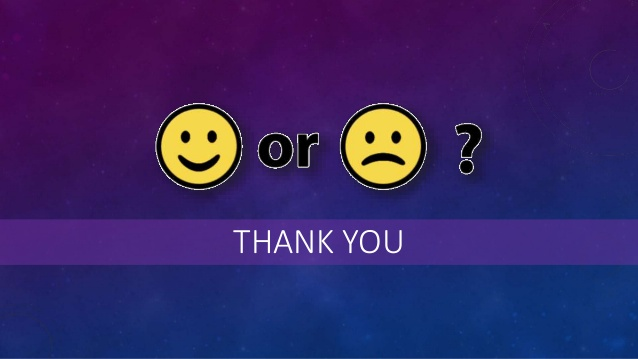